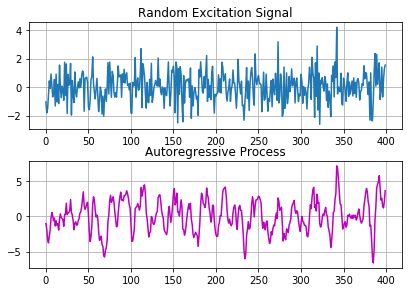

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process
#
a = np.array([1.2, -0.4])
S = ex.copy();
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, a) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,4))
plt.tight_layout()
ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")
ax[1].plot(range(N), S, color='m')
ax[1].grid(True)
ax[1].set_title("Autoregressive Process")
plt.savefig("AR_process.png")

(2000, 2)


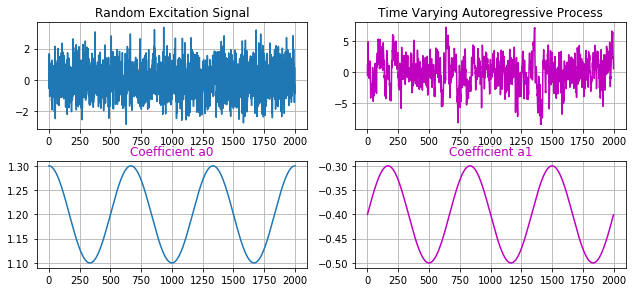

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Length of time series
#
N=2000
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process with coefficients slowly changing in time
#
a0 = np.array([1.2, -0.4])
A = np.zeros((N,2))
omega, alpha = N/2, 0.1
print(A.shape)
for n in range(N):
    A[n,0] = a0[0] + alpha * np.cos(6*np.pi*n/N)
    A[n,1] = a0[1] + alpha * np.sin(6*np.pi*n/N)
    
S2 = ex.copy();
for n in range(2, N):
    x = np.array([S2[n-1], S2[n-2]])
    S2[n] = np.dot(x, A[n,:]) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S2, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
plt.savefig("arChange.png")


You have a lot of freedom here: (i) for an assumed value of Q & R, does the filter indeed converge from different starting conditions? (ii) can we explore the role of Q and R in the speed of convergence? -- -if you structure your thought like this it would help design a few simulations that will show what might be going on.Hope that helps.
在这里你有很多自由:(i)对于一个假设的Q和R值，过滤器确实从不同的起始条件收敛吗?(ii)能否探究Q和R在收敛速度中的作用?--如果你像这样组织你的想法，它将有助于设计一些模拟，将显示可能发生的事情。希望有帮助。
(iii)固定 q，r 看不同的th_n1_n1和P_n1_n1的影响

Following the snippets of code provided, implement Kalman filter to estimate the parameters
of a synthetic second order AR process. Show how the parameters converge for five different
initial conditions. Try various values for the process noise covariance and measurement noise
variance and comment on their effects on convergence speeds. Show the convergence behaviour
of the filter for the AR process parameters being constant and time varying.
Initially, set the process noice covariance Q to a small value, say 0.01I and the measurement
noise variance to be of the same order of magnitude as the variance of the excitation signal of the
AR synthetic process. Vary these hyperparameters and observe the effect on the convergence of
the filter.

[ 1.2 -0.4]
[[ 1.32398464]
 [-0.4237042 ]]


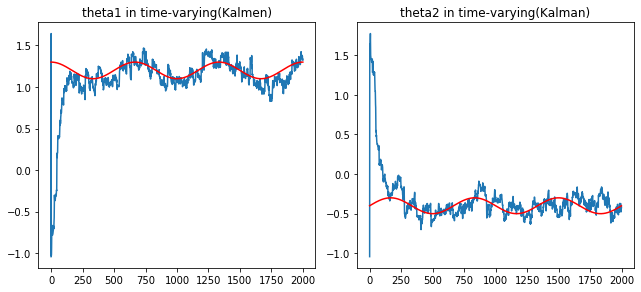

In [25]:
# Time series data y
# th_n_n: estimate at time n using all data upto time n
# th_n_n1: estimate at time n using all data upto time n-1
#
# Initialize
#
def time_varying():
    x = np.zeros((2,1))
    th_n1_n1 = np.random.randn(2, 1)
    P_n1_n1 = 0.001*np.eye(2)  # theta的方差矩阵
# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples)
# Guess for process noise
#

# best R= 1 and beta = 0.01
    R = 0.1*np.std(ex[0:10])
    beta = 0.0001
    Q = beta*np.eye(2)  # 过程噪声
    y = S2.copy()  #
# Space to store and plot
#
    th_conv = np.zeros([2, N])
    ePlot = np.zeros(N)
# First two estimates are initial guesses
#
    th_conv[0,0] = th_n1_n1[0]
    th_conv[0,1] = th_n1_n1[1]
    th_conv[1,0] = th_n1_n1[0]
    th_conv[1,1] = th_n1_n1[1]
# Kalman Iteration Loop (univariate observation, start from time step 2)
#
    for n in range(2, N):
        x[0] = y[n-1]
        x[1] = y[n-2]
# Prediction of state and covariance
        th_n_n1 = th_n1_n1.copy()
        P_n_n1 = P_n1_n1 + Q
        yh = th_n_n1.T @ x
        en = y[n] - yh
        ePlot[n] = en
# Kalman gain (kn) and innovation variance (den)
        den = x.T @ P_n1_n1 @ x + R
        kn = P_n1_n1 @ x / den
# Posterior update
#
        th_n_n = th_n_n1 + kn * en
        P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1
# Save
        th_conv[0,n] = th_n_n[0]
        th_conv[1,n] = th_n_n[1]
# Remember for next step
#
        th_n1_n1 = th_n_n.copy()
        P_n1_n1 = P_n_n.copy()
    return P_n1_n1, th_n1_n1, th_conv

def time_constant():
    x = np.zeros((2,1))
    th_n1_n1 = np.random.randn(2, 1)
    P_n1_n1 = 0.001*np.eye(2)
# Noise variances -- hyperparameters (to be tuned)
# Set measurement noise as fraction of data variance (first few samples)
# Guess for process noise
#

# best R= 1 and beta = 0.01
    R = 1*np.std(ex[0:10])
    beta = 0.001
    Q = beta*np.eye(2)
    y = S2.copy()
# Space to store and plot
#
    th_conv = np.zeros([2, N])
    ePlot = np.zeros(N)
# First two estimates are initial guesses
#
    th_conv[0,0] = th_n1_n1[0]
    th_conv[0,1] = th_n1_n1[1]
    th_conv[1,0] = th_n1_n1[0]
    th_conv[1,1] = th_n1_n1[1]
# Kalman Iteration Loop (univariate observation, start from time step 2)
#
    for n in range(2, N):
        x[0] = y[n-1]
        x[1] = y[n-2]
# Prediction of state and covariance
        th_n_n1 = th_n1_n1.copy()
        P_n_n1 = P_n1_n1 + Q
        yh = th_n_n1.T @ x
        en = y[n] - yh
        ePlot[n] = en
# Kalman gain (kn) and innovation variance (den)
        den = x.T @ P_n1_n1 @ x + R
        kn = P_n1_n1 @ x / den
# Posterior update
#
        th_n_n = th_n_n1 + kn * en
        P_n_n = (np.eye(2) - kn @ x.T) @ P_n_n1
# Save
        th_conv[0,n] = th_n_n[0]
        th_conv[1,n] = th_n_n[1]
# Remember for next step
#
        th_n1_n1 = th_n_n.copy()
        P_n1_n1 = P_n_n.copy()
    return P_n1_n1, th_n1_n1, th_conv

P_n1_n1, th_n_n, th_conv = time_varying()
# P_n1_n1_2, th_n_n2, th_conv2 = time_constant()
    
print(a)
print(th_n_n)
# print(th_n_n2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[0].plot(th_conv[0])
ax[0].plot(range(N), A[:,0], color='r')
ax[0].set_title("theta1 in time-varying(Kalmen)")
ax[1].plot(th_conv[1])
ax[1].plot(range(N), A[:,1], color='r')
ax[1].set_title("theta2 in time-varying(Kalman)")


plt.savefig("change th kalman.png")